<a href="https://www.kaggle.com/code/ziadhamadafathy/predict-diseases-by-some-ml-models-acc-100?scriptVersionId=119287364" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/disease-prediction-using-machine-learning/Training.csv
/kaggle/input/disease-prediction-using-machine-learning/Testing.csv


In [2]:
df_train = pd.read_csv('../input/disease-prediction-using-machine-learning/Training.csv')

In [3]:
df_train

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,NaN
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,Psoriasis,NaN


In [4]:
df_train.drop(columns='Unnamed: 133', inplace=True)

In [5]:
df_train.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [6]:
df_train['prognosis'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

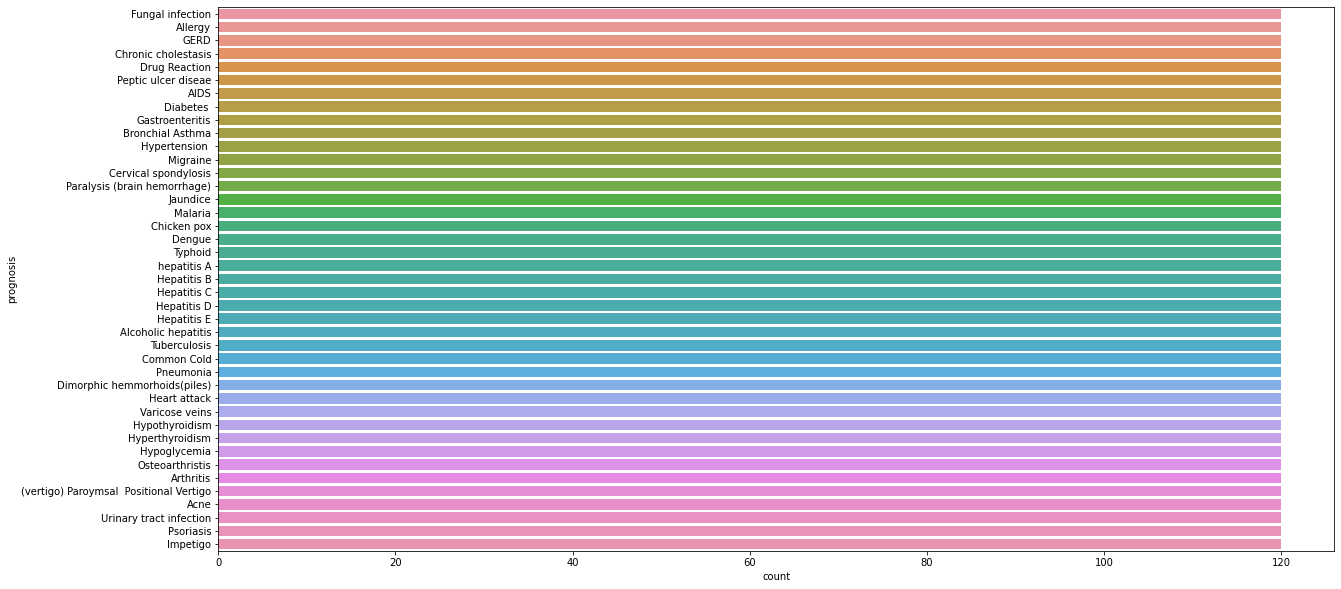

In [7]:
plt.figure(figsize=(20,10))
sns.countplot(y=df_train['prognosis'])
plt.show()

**convert prognosis column to numerical**

In [8]:
le = preprocessing.LabelEncoder()
df_train['prognosis'] = le.fit_transform(df_train['prognosis'])

In [9]:
df_train

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,2
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,38
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,35


In [10]:
X = df_train.drop(columns=['prognosis'])
y = df_train['prognosis']

**Splitiing data**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44, shuffle =True)

**LogisticRegression Model**

In [12]:
LogisticRegressionModel = LogisticRegression()
LogisticRegressionModel.fit(X_train, y_train)

print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(X_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(X_test, y_test))

LogisticRegressionModel Train Score is :  1.0
LogisticRegressionModel Test Score is :  1.0


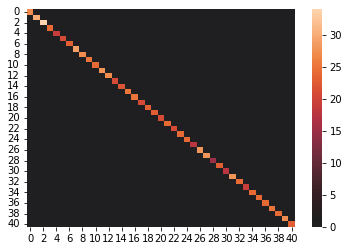

Confusion Matrix is
 [[27  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 34 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 27  0]
 [ 0  0  0 ...  0  0 23]]


In [13]:
y_pred_LR = LogisticRegressionModel.predict(X_test)
CM_LR = confusion_matrix(y_test, y_pred_LR)
sns.heatmap(CM_LR, center=True)
plt.show()
print('Confusion Matrix is\n', CM_LR)

In [14]:
print(classification_report(y_test, y_pred_LR))
print(accuracy_score(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        29
           8       1.00      1.00      1.00        27
           9       1.00      1.00      1.00        25
          10       1.00      1.00      1.00        24
          11       1.00      1.00      1.00        28
          12       1.00      1.00      1.00        27
          13       1.00      1.00      1.00        21
          14       1.00      1.00      1.00        22
          15       1.00      1.00      1.00        25
          16       1.00      1.00      1.00        25
          17       1.00    

**Decision Tree Model**

In [15]:
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='entropy',max_depth=23,random_state=44)
DecisionTreeClassifierModel.fit(X_train, y_train)

print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(X_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(X_test, y_test))

DecisionTreeClassifierModel Train Score is :  1.0
DecisionTreeClassifierModel Test Score is :  1.0


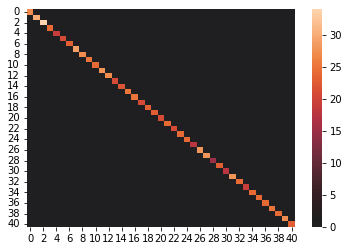

Confusion Matrix is
 [[27  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 34 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 27  0]
 [ 0  0  0 ...  0  0 23]]


In [16]:
y_pred_DT = DecisionTreeClassifierModel.predict(X_test)
CM_DT = confusion_matrix(y_test, y_pred_DT)
sns.heatmap(CM_DT, center=True)
plt.show()
print('Confusion Matrix is\n', CM_DT)

In [17]:
print(classification_report(y_test, y_pred_DT))
print(accuracy_score(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        29
           8       1.00      1.00      1.00        27
           9       1.00      1.00      1.00        25
          10       1.00      1.00      1.00        24
          11       1.00      1.00      1.00        28
          12       1.00      1.00      1.00        27
          13       1.00      1.00      1.00        21
          14       1.00      1.00      1.00        22
          15       1.00      1.00      1.00        25
          16       1.00      1.00      1.00        25
          17       1.00    

**Random Forest Model**

In [18]:
RandomForestClassifierModel = RandomForestClassifier(criterion = 'entropy', max_depth=12, n_estimators=100, 
                                                     random_state=44)
RandomForestClassifierModel.fit(X_train, y_train)

print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, y_test))

RandomForestClassifierModel Train Score is :  1.0
RandomForestClassifierModel Test Score is :  1.0


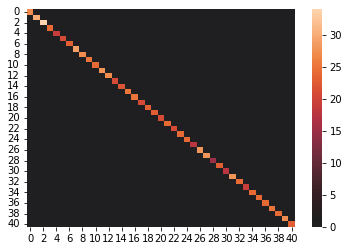

Confusion Matrix is
 [[27  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 34 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 27  0]
 [ 0  0  0 ...  0  0 23]]


In [19]:
y_pred_RF = RandomForestClassifierModel.predict(X_test)
CM_RF = confusion_matrix(y_test, y_pred_RF)

sns.heatmap(CM_RF, center=True)
plt.show()

print('Confusion Matrix is\n', CM_RF)

In [20]:
print(classification_report(y_test, y_pred_RF))
print(accuracy_score(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        29
           8       1.00      1.00      1.00        27
           9       1.00      1.00      1.00        25
          10       1.00      1.00      1.00        24
          11       1.00      1.00      1.00        28
          12       1.00      1.00      1.00        27
          13       1.00      1.00      1.00        21
          14       1.00      1.00      1.00        22
          15       1.00      1.00      1.00        25
          16       1.00      1.00      1.00        25
          17       1.00    

**Gradient Boosting Model**

In [21]:
GBCModel = GradientBoostingClassifier(n_estimators=100, max_depth=2, learning_rate=1, random_state=44)
GBCModel.fit(X_train, y_train)
print('GBCModel Train Score is : ' , GBCModel.score(X_train, y_train))
print('GBCModel Test Score is : ' , GBCModel.score(X_test, y_test))

GBCModel Train Score is :  1.0
GBCModel Test Score is :  1.0


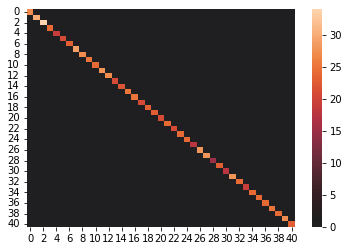

Confusion Matrix is
 [[27  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 34 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 27  0]
 [ 0  0  0 ...  0  0 23]]


In [22]:
y_pred_GB = GBCModel.predict(X_test)
CM_GB = confusion_matrix(y_test, y_pred_GB)

sns.heatmap(CM_GB, center=True)
plt.show()

print('Confusion Matrix is\n', CM_GB)

In [23]:
print(classification_report(y_test, y_pred_GB))
print(accuracy_score(y_test, y_pred_GB))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        29
           8       1.00      1.00      1.00        27
           9       1.00      1.00      1.00        25
          10       1.00      1.00      1.00        24
          11       1.00      1.00      1.00        28
          12       1.00      1.00      1.00        27
          13       1.00      1.00      1.00        21
          14       1.00      1.00      1.00        22
          15       1.00      1.00      1.00        25
          16       1.00      1.00      1.00        25
          17       1.00    

**Voting Model**

In [24]:
VotingClassifierModel = VotingClassifier(estimators=[('LRModel',LogisticRegressionModel),
                                                     ('GBCModel',GBCModel),
                                                     ('RFCModel',RandomForestClassifierModel),
                                                     ('TDCModel',DecisionTreeClassifierModel)],
                                         voting='hard')
VotingClassifierModel.fit(X_train, y_train)
print('VotingClassifierModel Train Score is : ' , VotingClassifierModel.score(X_train, y_train))
print('VotingClassifierModel Test Score is : ' , VotingClassifierModel.score(X_test, y_test))

VotingClassifierModel Train Score is :  1.0
VotingClassifierModel Test Score is :  1.0


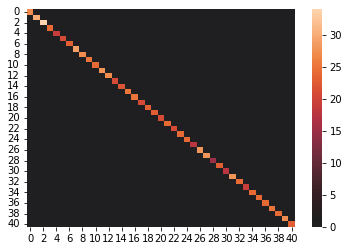

Confusion Matrix is
 [[27  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 34 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 27  0]
 [ 0  0  0 ...  0  0 23]]


In [25]:
y_pred_V = VotingClassifierModel.predict(X_test)
CM_V = confusion_matrix(y_test, y_pred_V)
sns.heatmap(CM_V, center=True)
plt.show()
print('Confusion Matrix is\n', CM_V)

In [26]:
print(classification_report(y_test, y_pred_V))
print(accuracy_score(y_test, y_pred_V))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        29
           8       1.00      1.00      1.00        27
           9       1.00      1.00      1.00        25
          10       1.00      1.00      1.00        24
          11       1.00      1.00      1.00        28
          12       1.00      1.00      1.00        27
          13       1.00      1.00      1.00        21
          14       1.00      1.00      1.00        22
          15       1.00      1.00      1.00        25
          16       1.00      1.00      1.00        25
          17       1.00    